# This notebook is for visulizing GWAS results

## 1. Check the LDL TR GWAS signal from AWIGEN
## 2. Compare the AWIGEN LDL TR GWAS to the UKB African LDL GWAS

In [6]:
import pandas as pd
from qmplot import manhattanplot
import matplotlib.pyplot as plt

In [22]:
chrom=1
awigen_ldl=pd.DataFrame()
sig_p=5e-8
for chrom in range(1,23):
    curr_file=f"/expanse/protected/gymreklab-dbgap/mount/H3Africa/DS_I_Africa_project/from_ilifu/results/GWAS/associations/friedewald_ldl_c/merged_chr{chrom}_TRs_gwas.friedewald_ldl_c_c_qc.glm.linear"
    curr_df=pd.read_csv(curr_file,sep="\t")
    curr_df=curr_df[curr_df['ERRCODE']!='CONST_OMITTED_ALLELE'].copy()
    curr_df.drop(columns="ERRCODE",inplace=True)
    awigen_ldl=pd.concat([awigen_ldl,curr_df],ignore_index=True)
    if len(curr_df[curr_df.P<sig_p])>0:
        print(f'chr{chrom} :{len(curr_df[curr_df.P<sig_p])}')
awigen_ldl["#CHROM"]=awigen_ldl["#CHROM"].astype(str)
awigen_ldl.to_csv("/expanse/protected/gymreklab-dbgap/mount/H3Africa/DS_I_Africa_project/from_ilifu/results/GWAS/associations/friedewald_ldl_c/merged_all_chromosome_friedewald_ldl.tsv",sep="\t",index=False)

chr1 :1
chr13 :1
chr19 :9


In [9]:
ukb_afr="/expanse/protected/gymreklab-dbgap/mount/H3Africa/DS_I_Africa_project/from_ilifu/other_gwas_results/margoliash-et-al-2023/black_ldl_cholesterol_direct_str_gwas_results.tab"
afr_ldl=pd.read_csv(ukb_afr,sep="\t")
afr_ldl.rename(columns={"chromosome":"#CHROM","start_pos (hg38)":"POS","p_value":"P"},inplace=True)
afr_ldl["#CHROM"]=afr_ldl["#CHROM"].astype(str)
afr_ldl["ID"]=afr_ldl.apply(lambda x: f'{x["#CHROM"]}:{x["POS"]}:{x["repeat_unit"]}',axis=1)

Text(0.5, 1.0, 'UKB (African) LDL GWAS')

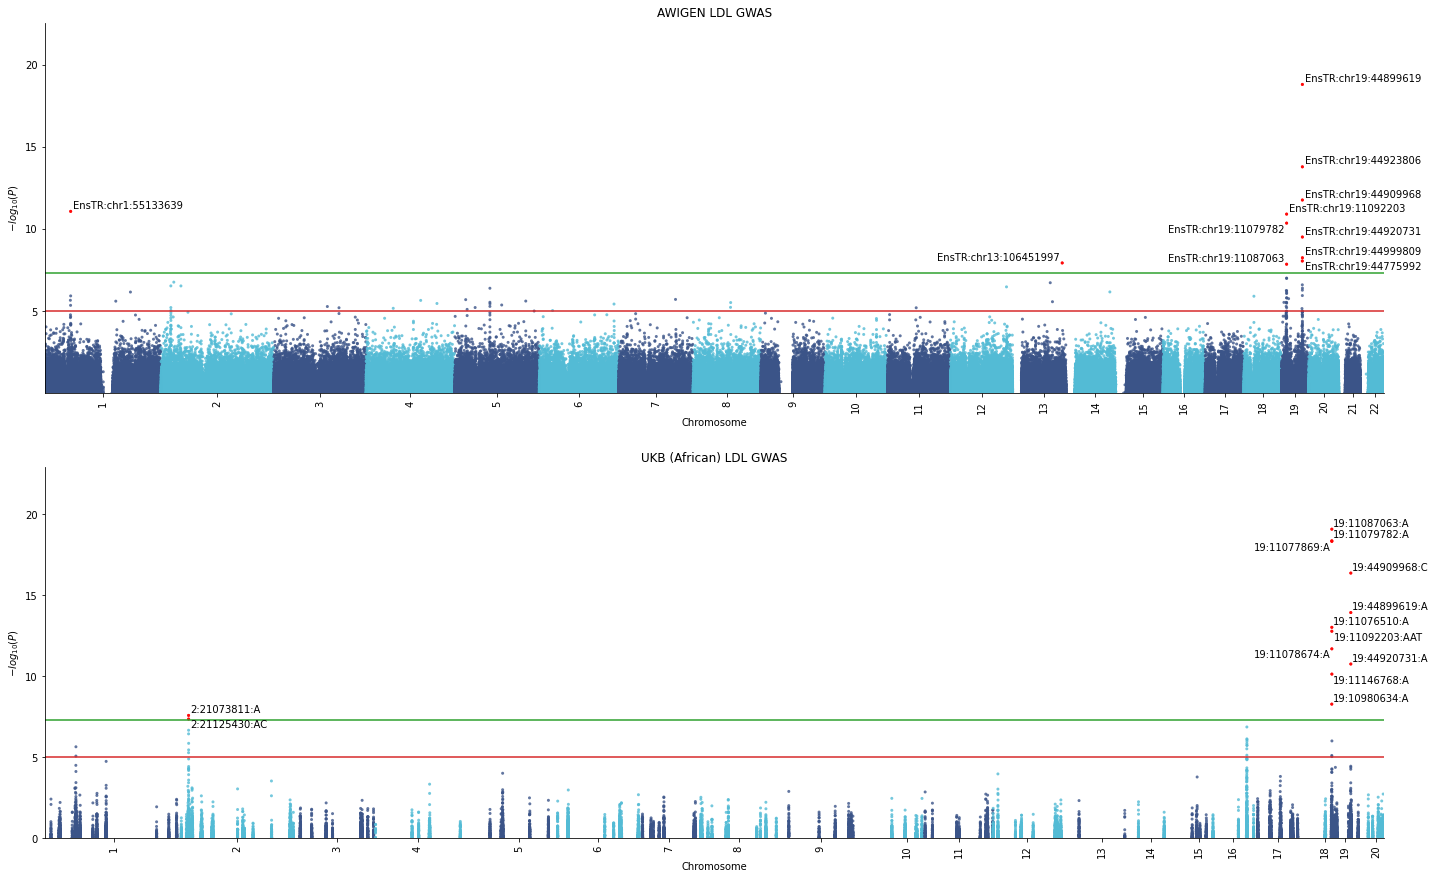

In [21]:
sig_p=5e-8
f, ax = plt.subplots(2,1,figsize=(24, 15))
ax_list=ax.flatten()
manhattanplot(data=awigen_ldl,
              sign_marker_p=sig_p,
              is_annotate_topsnp=True,
              ld_block_size=100,
              xticklabel_kws={"rotation": "vertical"},
              ax=ax_list[0])
ax_list[0].set_title("AWIGEN LDL GWAS")

manhattanplot(data=afr_ldl,
              sign_marker_p=sig_p,
              is_annotate_topsnp=True,
              ld_block_size=100,
              xticklabel_kws={"rotation": "vertical"},
              ax=ax_list[1])
ax_list[1].set_title("UKB (African) LDL GWAS")

gwas signals between two studies

In [23]:
# awigen_ldl[(awigen_ldl.P<5e-8) & (awigen_ldl['#CHROM']=="19")].merge(afr_ldl[(afr_ldl.P<5e-8) & (afr_ldl['#CHROM']=="19")][["#CHROM","POS"]],on=["#CHROM","POS"])

### Check the SNPs regression data

In [2]:
chrom=1
awigen_ldl=pd.DataFrame()
sig_p=5e-8
for chrom in range(19,20):
    curr_file=f"/expanse/protected/gymreklab-dbgap/mount/H3Africa/DS_I_Africa_project/from_ilifu/results/GWAS/associations/ldl_c/merged_chr{chrom}_SNPs_gwas.friedewald_ldl_c_c_qc.glm.linear"
    curr_df=pd.read_csv(curr_file,sep="\t")
    curr_df=curr_df[curr_df['ERRCODE']!='CONST_OMITTED_ALLELE'].copy()
    curr_df.drop(columns="ERRCODE",inplace=True)
    awigen_ldl=pd.concat([awigen_ldl,curr_df],ignore_index=True)
    if len(curr_df[curr_df.P<sig_p])>0:
        print(f'chr{chrom} :{len(curr_df[curr_df.P<sig_p])}')

chr19 :151


<AxesSubplot:xlabel='Chromosome', ylabel='$-log_{10}{(P)}$'>

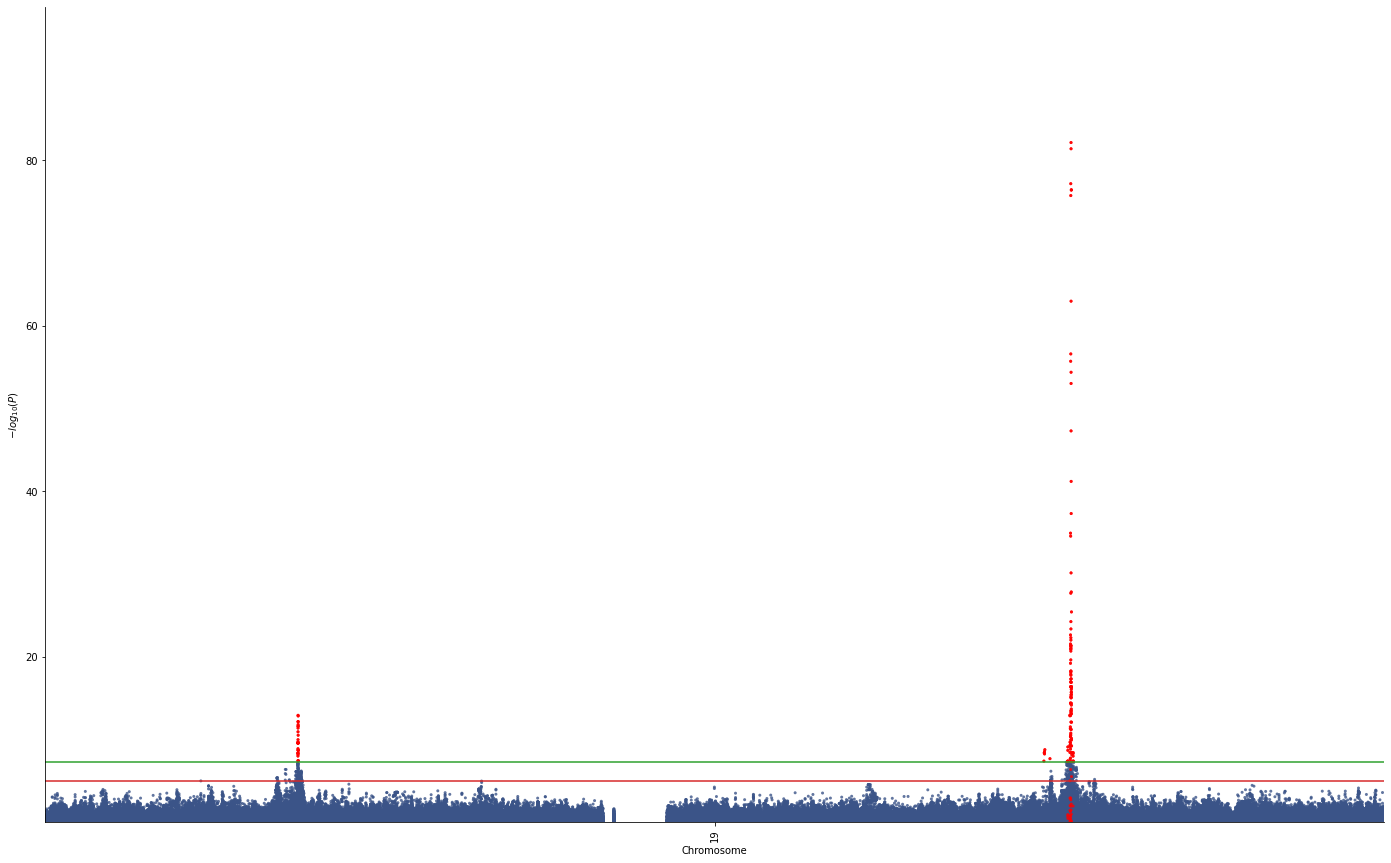

In [6]:
sig_p=5e-8
f, ax = plt.subplots(figsize=(24, 15))
manhattanplot(data=awigen_ldl,
              sign_marker_p=sig_p,
#               is_annotate_topsnp=True,
              ld_block_size=0,
              xticklabel_kws={"rotation": "vertical"},
              ax=ax)

In [2]:
# awigen_ldl[awigen_ldl.P<5e-8][awigen_ldl[awigen_ldl.P<5e-8].duplicated(subset=["POS"],keep=False)]